## IEEE Victoris 1.0 Filtration Phase
#### Predict the rotor bearing temperature
#### https://www.kaggle.com/competitions/ieee-victoris-10-filtration-phase 
the goal is to predict the rotor bearing temperature, which is the Target column in the dataset.

In [61]:
import pandas as pd 

In [62]:
data=pd.read_csv(r'C:\Users\user\Downloads\ieee-victoris-10-filtration-phase\IEEE_train_data.csv',sep=',')
data

,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,0,6/22/2021 13:15,59.071225,59.117203,35.765579,NaN,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,Turbine_01,48.670906
1,1,11/6/2021 17:40,258.278976,253.123637,33.392501,789.391492,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,Turbine_97,47.779032
2,2,12/23/2021 21:08,234.884260,236.785260,33.320189,NaN,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,Turbine_158,45.542946
3,3,1/2/2021 16:01,50.535151,37.784692,NaN,NaN,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,Turbine_20,47.515691
4,4,12/6/2021 17:46,247.842835,241.342895,32.897556,NaN,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,Turbine_20,44.625755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,591234,3/18/2021 19:37,121.264847,108.633915,28.822063,NaN,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061,Turbine_97,49.511423
591235,591235,7/24/2021 4:54,679.381755,699.714915,26.066999,NaN,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994,Turbine_15,46.682127
591236,591236,11/9/2021 13:51,289.928238,285.483582,31.997511,821.810130,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216,Turbine_14,49.314674
591237,591237,2/2/2021 2:58,28.318385,12.871501,33.040375,NaN,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640,Turbine_20,51.652792


## 1-visualization of data for more understanding 

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline

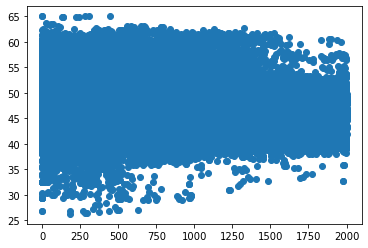

In [64]:
plt.scatter(data.active_power_calculated_by_converter,data.Target)


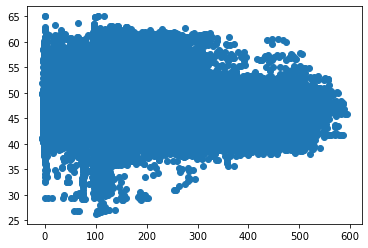

In [65]:
plt.scatter(data.reactive_power,data.Target)

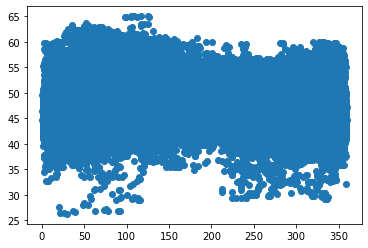

In [66]:
plt.scatter(data.wind_direction_raw,data.Target)

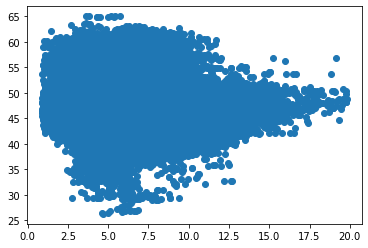

In [67]:
plt.scatter(data.wind_speed_raw,data.Target)

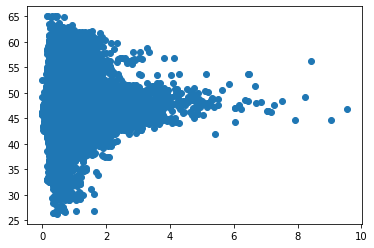

In [68]:
plt.scatter(data.wind_speed_turbulence,data.Target)

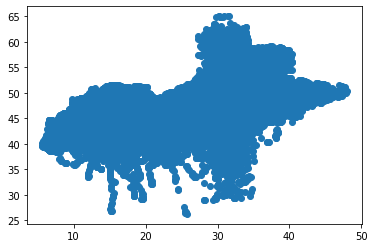

In [69]:
plt.scatter(data.ambient_temperature,data.Target)

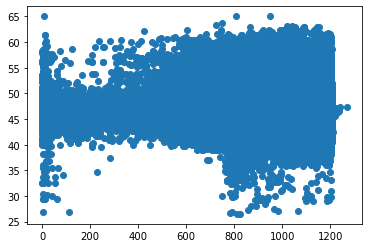

In [70]:
plt.scatter(data.generator_speed,data.Target)

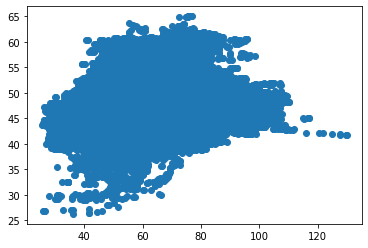

In [71]:
plt.scatter(data.generator_winding_temp_max,data.Target)


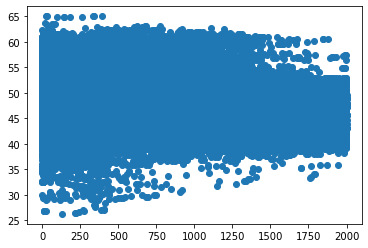

In [72]:
plt.scatter(data.grid_power10min_average,data.Target)

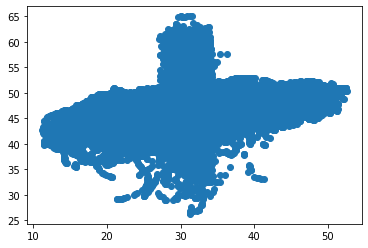

In [73]:
plt.scatter(data.nc1_inside_temp,data.Target)

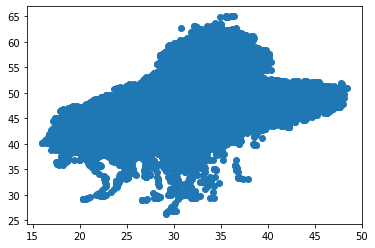

In [74]:
plt.scatter(data.nacelle_temp,data.Target)

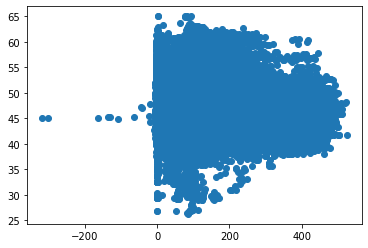

In [75]:
plt.scatter(data.reactice_power_calculated_by_converter,data.Target)

## 2-cleaning data 

In [76]:
data.isnull().sum()

id                                             0
timestamp                                      0
active_power_calculated_by_converter          10
active_power_raw                              17
ambient_temperature                         9797
generator_speed                           316836
generator_winding_temp_max                     1
grid_power10min_average                       35
nc1_inside_temp                              232
nacelle_temp                                 218
reactice_power_calculated_by_converter         4
reactive_power                                 2
wind_direction_raw                             7
wind_speed_raw                                 1
wind_speed_turbulence                         15
turbine_id                                     4
Target                                         0
dtype: int64

In [77]:
df= data.drop(['generator_speed','ambient_temperature','id','timestamp'],axis='columns')
df

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,59.071225,59.117203,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,Turbine_01,48.670906
1,258.278976,253.123637,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,Turbine_97,47.779032
2,234.884260,236.785260,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,Turbine_158,45.542946
3,50.535151,37.784692,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,Turbine_20,47.515691
4,247.842835,241.342895,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,Turbine_20,44.625755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,121.264847,108.633915,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061,Turbine_97,49.511423
591235,679.381755,699.714915,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994,Turbine_15,46.682127
591236,289.928238,285.483582,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216,Turbine_14,49.314674
591237,28.318385,12.871501,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640,Turbine_20,51.652792


In [78]:
df = df.dropna()
df

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,59.071225,59.117203,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,Turbine_01,48.670906
1,258.278976,253.123637,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,Turbine_97,47.779032
2,234.884260,236.785260,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,Turbine_158,45.542946
3,50.535151,37.784692,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,Turbine_20,47.515691
4,247.842835,241.342895,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,Turbine_20,44.625755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,121.264847,108.633915,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061,Turbine_97,49.511423
591235,679.381755,699.714915,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994,Turbine_15,46.682127
591236,289.928238,285.483582,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216,Turbine_14,49.314674
591237,28.318385,12.871501,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640,Turbine_20,51.652792


In [79]:

df['turbine_id'] = df['turbine_id'].str.replace(r'Turbine_', '').astype(int)
df = df.dropna()
df

C:\Users\user\AppData\Local\Temp\ipykernel_23192\2142813701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['turbine_id'] = df['turbine_id'].str.replace(r'Turbine_', '').astype(int)


,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,59.071225,59.117203,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,1,48.670906
1,258.278976,253.123637,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,97,47.779032
2,234.884260,236.785260,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,158,45.542946
3,50.535151,37.784692,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,20,47.515691
4,247.842835,241.342895,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,20,44.625755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,121.264847,108.633915,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061,97,49.511423
591235,679.381755,699.714915,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994,15,46.682127
591236,289.928238,285.483582,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216,14,49.314674
591237,28.318385,12.871501,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640,20,51.652792


In [80]:
df.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

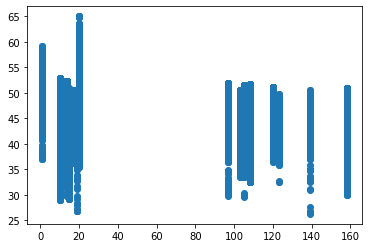

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df.turbine_id,df.Target)

In [112]:
df['reactice_power_calculated_by_converter']=df['reactice_power_calculated_by_converter'].abs()  #remove  negative outlayer
df

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,59.071225,59.117203,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196,1,48.670906
1,258.278976,253.123637,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840,97,47.779032
2,234.884260,236.785260,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809,158,45.542946
3,50.535151,37.784692,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113,20,47.515691
4,247.842835,241.342895,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984,20,44.625755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,121.264847,108.633915,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061,97,49.511423
591235,679.381755,699.714915,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994,15,46.682127
591236,289.928238,285.483582,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216,14,49.314674
591237,28.318385,12.871501,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640,20,51.652792


## 3-prepare x,y train and test 

In [83]:
x=df.drop(['Target','turbine_id'],axis='columns')
x

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,59.071225,59.117203,64.812227,167.234988,31.835583,35.661191,18.228060,24.117071,316.953893,4.016191,0.524196
1,258.278976,253.123637,57.227210,223.845406,32.870656,32.916340,84.444679,102.651681,70.390775,5.198709,0.311840
2,234.884260,236.785260,47.570285,182.448718,33.043858,29.726347,19.863061,38.311028,302.287781,5.443600,0.367809
3,50.535151,37.784692,33.838225,14.912772,33.752039,30.534683,94.085461,96.431728,93.148946,3.971027,0.631113
4,247.842835,241.342895,64.972858,226.304581,32.558620,32.711412,93.393299,103.011902,140.825768,4.746520,0.341984
...,...,...,...,...,...,...,...,...,...,...,...
591234,121.264847,108.633915,60.426447,78.542900,28.404571,32.300816,87.176760,97.308688,276.542084,3.921454,0.352061
591235,679.381755,699.714915,59.386416,609.587229,34.645046,32.662838,49.636947,73.951992,262.125946,6.539214,0.620994
591236,289.928238,285.483582,61.138416,517.386113,41.325528,37.321171,85.270166,106.643428,35.269936,4.627115,1.153216
591237,28.318385,12.871501,47.513898,8.731869,32.886009,30.212943,92.453150,95.705736,184.148130,3.581920,0.277640


In [91]:
y=df['Target']
y

0         48.670906
1         47.779032
2         45.542946
3         47.515691
4         44.625755
            ...    
591234    49.511423
591235    46.682127
591236    49.314674
591237    51.652792
591238    45.788853
Name: Target, Length: 590711, dtype: float64

In [87]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names =x.columns
d = scaler.fit_transform(x)
x_scaled = pd.DataFrame(d, columns=names)
x_scaled['turbine_id']=df['turbine_id'].to_numpy()
x_scaled

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,0.029536,0.029559,0.375932,0.083618,0.498927,0.606854,0.034793,0.049191,0.881897,0.164723,0.054732,1
1,0.129139,0.126565,0.303146,0.111923,0.523969,0.522089,0.161187,0.180493,0.195185,0.227321,0.032454,97
2,0.117442,0.118396,0.210478,0.091225,0.528159,0.423577,0.037914,0.072922,0.841050,0.240285,0.038326,158
3,0.025268,0.018893,0.078705,0.007456,0.545292,0.448539,0.179589,0.170094,0.258570,0.162332,0.065948,20
4,0.123921,0.120674,0.377473,0.113153,0.516420,0.515760,0.178268,0.181095,0.391356,0.203384,0.035616,20
...,...,...,...,...,...,...,...,...,...,...,...,...
590706,0.060632,0.054318,0.333846,0.039272,0.415919,0.503080,0.166402,0.171560,0.769344,0.159707,0.036674,97
590707,0.339691,0.349866,0.323866,0.304796,0.566897,0.514260,0.094746,0.132510,0.729193,0.298283,0.064886,15
590708,0.144964,0.142745,0.340678,0.258695,0.728521,0.658117,0.162763,0.187167,0.097369,0.197063,0.120720,14
590709,0.014159,0.006436,0.209937,0.004366,0.524340,0.438603,0.176473,0.168880,0.512015,0.141734,0.028866,20


In [88]:
x_scaled.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
dtype: int64

In [92]:

y=y*1000000
y_train=y.astype(int)
y_train

0         48670906
1         47779031
2         45542945
3         47515690
4         44625755
            ...   
591234    49511423
591235    46682127
591236    49314674
591237    51652791
591238    45788852
Name: Target, Length: 590711, dtype: int32

## 4- generate model 
##### RandomForestRegressor model best model after testing different models


In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(x_scaled,y_train, test_size=0.2)

In [96]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)
model_train_score = model.score(X_train, Y_train)
model_test_score = model.score(X_test, y_test)
print(f" model score on Training data: {model_train_score * 100}%\n model score on Testing data: {model_test_score * 100}%")



 model score on Training data: 97.17018401470382%
 model score on Testing data: 80.01207881182812%


In [113]:
model.fit(x_scaled,y_train)
model_train_score = model.score(x_scaled,y_train)
model_train_score


0.9728584626115397

## 5- make prediction on test data and prepare it for submission 

In [98]:
test=pd.read_csv(r'C:\Users\user\Downloads\ieee-victoris-10-filtration-phase\IEEE_test_data.csv',sep=',')
test

,id,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,0,4/5/2021 5:36,715.395435,727.824636,16.424948,NaN,57.012666,705.473653,32.653601,29.903539,114.583717,151.190527,220.806147,7.178372,0.518546,Turbine_123
1,1,1/22/2021 18:08,464.797602,477.312037,16.800411,966.249512,42.624767,112.306211,36.228663,33.264307,96.622513,118.003382,262.500356,6.120114,0.655806,Turbine_19
2,2,2/12/2021 23:35,124.409334,116.650399,13.072779,NaN,60.494156,160.127332,33.011556,32.325333,83.454244,98.143848,34.148368,3.910857,0.253755,Turbine_18
3,3,4/20/2021 15:34,328.236440,325.810171,36.818389,854.034149,60.434220,199.202449,36.335106,34.576919,94.008233,105.963958,275.710378,5.411589,0.976659,Turbine_97
4,4,10/27/2021 2:19,436.704926,435.343811,27.606645,938.269928,55.116486,408.465846,33.643038,32.837904,99.589046,113.876025,62.810726,6.096257,0.374731,Turbine_120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318355,318355,8/26/2021 18:48,622.949971,631.412384,15.107923,966.638672,71.903409,1174.344014,32.236928,34.260293,109.945240,141.721199,335.754664,6.475428,1.521250,Turbine_103
318356,318356,1/10/2021 6:19,396.969040,404.398794,6.594684,NaN,44.614274,315.057226,24.749385,20.831491,76.484844,112.900700,53.597458,5.973086,0.438560,Turbine_18
318357,318357,4/26/2021 17:22,13.202641,6.497380,42.318048,NaN,49.114435,5.470140,50.606016,47.884775,61.131982,93.452593,180.212852,3.579195,0.363856,Turbine_14
318358,318358,6/1/2021 11:29,802.239389,823.065055,31.589139,NaN,64.151240,628.539333,31.238678,31.926563,135.257399,167.675648,236.931366,7.417698,1.088798,Turbine_158


In [99]:
test=test.drop(['generator_speed','ambient_temperature','id','timestamp'],axis='columns')
test['reactice_power_calculated_by_converter']=test['reactice_power_calculated_by_converter'].abs()
X_test=test.drop(['turbine_id'],axis='columns')
X_test

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,715.395435,727.824636,57.012666,705.473653,32.653601,29.903539,114.583717,151.190527,220.806147,7.178372,0.518546
1,464.797602,477.312037,42.624767,112.306211,36.228663,33.264307,96.622513,118.003382,262.500356,6.120114,0.655806
2,124.409334,116.650399,60.494156,160.127332,33.011556,32.325333,83.454244,98.143848,34.148368,3.910857,0.253755
3,328.236440,325.810171,60.434220,199.202449,36.335106,34.576919,94.008233,105.963958,275.710378,5.411589,0.976659
4,436.704926,435.343811,55.116486,408.465846,33.643038,32.837904,99.589046,113.876025,62.810726,6.096257,0.374731
...,...,...,...,...,...,...,...,...,...,...,...
318355,622.949971,631.412384,71.903409,1174.344014,32.236928,34.260293,109.945240,141.721199,335.754664,6.475428,1.521250
318356,396.969040,404.398794,44.614274,315.057226,24.749385,20.831491,76.484844,112.900700,53.597458,5.973086,0.438560
318357,13.202641,6.497380,49.114435,5.470140,50.606016,47.884775,61.131982,93.452593,180.212852,3.579195,0.363856
318358,802.239389,823.065055,64.151240,628.539333,31.238678,31.926563,135.257399,167.675648,236.931366,7.417698,1.088798


In [100]:
X_test.isnull().sum()

active_power_calculated_by_converter        7
active_power_raw                           10
generator_winding_temp_max                  0
grid_power10min_average                    17
nc1_inside_temp                           123
nacelle_temp                              125
reactice_power_calculated_by_converter      1
reactive_power                              5
wind_direction_raw                          2
wind_speed_raw                              2
wind_speed_turbulence                       7
dtype: int64

In [101]:
X_test[X_test['wind_direction_raw'].isna()]

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
11100,31.868105,37.801326,38.553320,35.776178,29.483319,27.654029,94.264609,96.318216,NaN,4.144673,0.431674
232875,399.724528,402.634201,53.543827,259.057162,17.365468,23.992085,102.122742,114.526493,NaN,5.632500,1.057246


In [102]:
X_test['wind_speed_raw'].mean()

5.895136325209285

In [103]:
X_test=X_test.apply(lambda x: x.fillna(x.mean()),axis=0)
X_test

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,715.395435,727.824636,57.012666,705.473653,32.653601,29.903539,114.583717,151.190527,220.806147,7.178372,0.518546
1,464.797602,477.312037,42.624767,112.306211,36.228663,33.264307,96.622513,118.003382,262.500356,6.120114,0.655806
2,124.409334,116.650399,60.494156,160.127332,33.011556,32.325333,83.454244,98.143848,34.148368,3.910857,0.253755
3,328.236440,325.810171,60.434220,199.202449,36.335106,34.576919,94.008233,105.963958,275.710378,5.411589,0.976659
4,436.704926,435.343811,55.116486,408.465846,33.643038,32.837904,99.589046,113.876025,62.810726,6.096257,0.374731
...,...,...,...,...,...,...,...,...,...,...,...
318355,622.949971,631.412384,71.903409,1174.344014,32.236928,34.260293,109.945240,141.721199,335.754664,6.475428,1.521250
318356,396.969040,404.398794,44.614274,315.057226,24.749385,20.831491,76.484844,112.900700,53.597458,5.973086,0.438560
318357,13.202641,6.497380,49.114435,5.470140,50.606016,47.884775,61.131982,93.452593,180.212852,3.579195,0.363856
318358,802.239389,823.065055,64.151240,628.539333,31.238678,31.926563,135.257399,167.675648,236.931366,7.417698,1.088798


In [104]:
X_test.loc[[86916,224655]]

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
86916,1696.544698,1748.574015,73.894054,1723.301737,32.616341,28.894573,356.812368,406.591426,95.914347,5.895136,0.679364
224655,678.428253,692.648285,53.517630,676.427541,29.997926,26.760936,122.910819,145.027044,228.204926,5.895136,0.421256


In [105]:
test.turbine_id.value_counts()

Turbine_120    20208
Turbine_18     20165
Turbine_97     20139
Turbine_15     20136
Turbine_158    20111
Turbine_105    20047
Turbine_13     20039
Turbine_108    20018
Turbine_103    19966
Turbine_139    19941
Turbine_19     19889
Turbine_20     19816
Turbine_14     19798
Turbine_123    19590
Turbine_10     19416
Turbine_01     19080
Name: turbine_id, dtype: int64

In [106]:
test['turbine_id'].fillna(value="Turbine_120", inplace=True)
test['turbine_id'] = test['turbine_id'].str.replace(r'Turbine_', '').astype(int)
test['turbine_id']

0         123
1          19
2          18
3          97
4         120
         ... 
318355    103
318356     18
318357     14
318358    158
318359     13
Name: turbine_id, Length: 318360, dtype: int32

In [107]:

scaler = preprocessing.MinMaxScaler()
names = X_test.columns
m = scaler.fit_transform(X_test)
X_test = pd.DataFrame(m, columns=names)
X_test['turbine_id']=test['turbine_id'].to_numpy()
X_test

,active_power_calculated_by_converter,active_power_raw,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,0.357698,0.363915,0.301474,0.352738,0.516510,0.423668,0.220537,0.266460,0.613505,0.332308,0.059084,123
1,0.232399,0.238658,0.161741,0.056153,0.602350,0.528351,0.185967,0.210010,0.729730,0.276256,0.074726,19
2,0.062205,0.058326,0.335286,0.080064,0.525105,0.499104,0.160622,0.176230,0.093182,0.159238,0.028909,18
3,0.164118,0.162906,0.334704,0.099601,0.604906,0.569238,0.180935,0.189531,0.766554,0.238727,0.111290,97
4,0.218353,0.217674,0.283059,0.204234,0.540267,0.515070,0.191677,0.202990,0.173081,0.274992,0.042695,120
...,...,...,...,...,...,...,...,...,...,...,...,...
318355,0.311475,0.315709,0.446091,0.587174,0.506506,0.559375,0.211609,0.250353,0.933932,0.295076,0.173350,103
318356,0.198485,0.202201,0.181063,0.157529,0.326725,0.141084,0.147209,0.201331,0.147398,0.268468,0.049969,18
318357,0.006601,0.003249,0.224768,0.002735,0.947560,0.983761,0.117659,0.168250,0.500348,0.141671,0.041456,14
318358,0.401120,0.411536,0.370803,0.314271,0.482537,0.486682,0.260327,0.294501,0.658455,0.344985,0.124069,158


In [108]:
y_predicted=model.predict(X_test)
output = y_predicted/1000000

output

array([43.6614308 , 41.10206693, 45.27125637, ..., 50.94361476,
       46.13891112, 48.7202934 ])

In [109]:
file=pd.DataFrame(output, columns=['Target'])
file.insert(0, 'id', file.index)
file

,id,Target
0,0,43.661431
1,1,41.102067
2,2,45.271256
3,3,47.363944
4,4,46.136082
...,...,...
318355,318355,46.007568
318356,318356,39.909837
318357,318357,50.943615
318358,318358,46.138911


In [110]:
file.to_csv(r"C:\Users\user\Downloads\ieee-victoris-10-filtration-phase\ieee_3.csv",index=False)

In [111]:
read=pd.read_csv(r"C:\Users\user\Downloads\ieee-victoris-10-filtration-phase\ieee_3.csv",index_col=0)
read

,Target
id,
0,43.661431
1,41.102067
2,45.271256
3,47.363944
4,46.136082
...,...
318355,46.007568
318356,39.909837
318357,50.943615
